<div style="text-align: center;">
    <a href="https://www.ip-paris.fr/">
        <img border="0" src="https://drive.google.com/uc?export=view&id=1Pu9Ua3kCSZaqwi3QdlbDFFcJTozC0F0N" width="90%"></a>
</div>

---

<div style="text-align: center">
    <h1>Data Camp project 2020</h1>
    <h2><i>Ramp on mind big data</i></h2>
        
</div>

<div style="text-align: center">
<img src="https://drive.google.com/uc?export=view&id=1JSUGBPkZH9yhKvxdtDj3iuX8brVFCmOQ">
</div>

<div style="text-align: right">
    <em>
        Authors : Ahmed L. - Mohamed E. - Rania F. - Yassine F.
    </em>
</div>

---

# Table of content
1. [Introduction](#Introduction)
    - [Description](#Introduction)
    - [Objectives](#Objectives)
    - [Brief on the original data](#Original_Data)
    - [Transformations and final dataset](#Transformations_and_final_set)   
2. [Data exploration](#Data_exploration)
    - [Data format](#Data_Format)
    - [Signals visualization](#Visualizing_signals)
    - [Data distribution](#Data_distribution)
3. [Feature extraction](#Feature_extraction)
    - [Fourier Transform](#Fourier_Transform)
    - [Wavelets](#Wavelets)
4. [Estimator: Multi estimators](#Estimator)
5. [Submission](#Submission)

---

# Introduction

This project is based on **EEG**s signals. [Electroencephalography](https://en.wikipedia.org/wiki/Electroencephalography) is a monitoring method to record electrical activity of the brain. Non-invasive electrodes are placed on different locations on the scalp and the signals are retrieved. 

The goal of this challenge is to be able to predict a seen digit **from 0 to 9** based on the signals recorded from the brain of a subject who saw the same digit, and so is thinking about it. Which leads to the name of our dataset The ["MNIST of Brain Digits"](http://www.mindbigdata.com/opendb/?fbclid=IwAR0xGKJWvMIx1Q5cuhGFEBJlI_J3vHPCFuYG_57tDqfBXyJj3WPFKx2qUQs). It originally contains over a million brain signals, of 2 seconds each, captured with the stimulus of seeing a digit form **0** to **9**. 

These signals were captured using **4 different EEGs devices**, [NeuroSky Mindwave](https://store.neurosky.com/), [emotiv EPOC](https://www.emotiv.com/epoc/), [Interaxon Muse](https://choosemuse.com/) and [Emotiv Insight](https://www.emotiv.com/insight/), covering a total of 19 brain locations.

Some signals were registered **randomly**, when the subject was not thinking of any particular digit. The corresponding signals will be labelled **-1**. 

Which leads as to deal with a **multi-classification** problem of a total of **11** classes: **-1, 0, .., 9**.

<div class="alert alert-block alert-warning">
<b>Heads up!</b> This challenge is a hard one, first, because of the complex structure of the data, second, because the task of predicting what a person is thinking about is not so trivial. We don't expect the final score to be high and research is still being conducted in this field.
</div>

# Objectives

<div>
    While it is very interesting to try to contribute to the recent studies and improve the accuracy, this project would serve as practice and sculpture of many other skills:<br>
<ul>
    <li>To work and be able to work with complex data structure, such as time-series.</li>
    <li>To learn to extract interesting features from complex data.</li>
    <li>To implement and combine multi-estimators that deal well with each category.</li>
    <li>To work on and contribute to a challenging task.</li>
</ul>
</div>

# Brief on the original data

The original data contains raw signals with no further pre-processing, which means that they come as they are read from the EEG device. Each device has a different number of **channels**. For each experience; the act of seeing a certain digit, we have as many events as the number of channels.

# Transformation and Final set

We decided to keep the raw aspect of the data, but to change however, its structure and take into consideration that for each experience, many events are registered and should be grouped together. In brief, we now have for each experience, a **list** containing the different signals corresponding to different channels.

Finally, we concatenated the datasets coming from the **4** devices, shuffled the rows, and made sure the signal values are **floats** so don't worry about that.

In [2]:
import pandas as pd
from problem import get_train_data
X, y = get_train_data()

In [3]:
X.head()

,device,size,signals,channels
0,EP,260,"[[4391.282051, 4395.384615, 4393.333333, 4390....","['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', '..."
1,IN,256,"[[4332.307692, 4325.641025, 4321.538461, 4330....","['AF3', 'AF4', 'T7', 'T8', 'PZ']"
2,IN,260,"[[4304.102564, 4306.666666, 4321.538461, 4298....","['AF3', 'AF4', 'T7', 'T8', 'PZ']"
3,MW,952,"[[18.0, 17.0, 13.0, 19.0, 39.0, 53.0, 52.0, 35...",['FP1']
4,MU,476,"[[526.0, 518.0, 521.0, 516.0, 516.0, 515.0, 52...","['TP9', 'FP1', 'FP2', 'TP10']"


---

# Data Format

<div>
As you can see, there aren't many features in the dataset. The difficulty lays in the manipulation and the capacity to exploit the complexe structure of the signals. Let us explain each feature.<br>
    <ul>
        <li><b>device:</b> This is the device used to record the signal. As we've said before, there is a total of 4 different devices. It is a 2 character string; <b>"MW"</b> for MindWave, <b>"EP"</b> for Emotive Epoc, <b>"MU"</b> for Interaxon Muse & <b>"IN"</b> for Emotiv Insight.</li>
        <br>
        <li><b>size:</b> This is the length of the recorded signal for every channel. Signals are recorded for a period of 2 seconds, in different channels. since the Hz of each device varies, in "theory" the value is close to 512Hz for MW, 128Hz for EP, 220Hz for MU & 128Hz for IN, for each of the 2 seconds</li>
            <br>
        <li><b>signals:</b> A list of a coma separated sets of numbers, with the time-series amplitude of the signal for each channel, each device uses a different precision to identify the electrical potential captured from the brain: integers in the case of MW & MU or real numbers in the case of EP & IN. All were converted to floats</li>
        <br>
            <li><b>channels:</b> A string, to indentify the 10/20 brain location of the signal, with possible values:<br><br>
                <ul>
                    <li><b>Mindwave:</b> "FP1"</li>
                    <li><b>EPOC:</b> "AF3, "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"</li>
                    <li><b>Muse:</b> "TP9,"FP1","FP2", "TP10"</li>
                    <li><b>Insight:</b> "AF3,"AF4","T7","T8","PZ" </li>
                </ul>
            </li>
        <br>
    </ul>
</div>

# Visualizing Signals

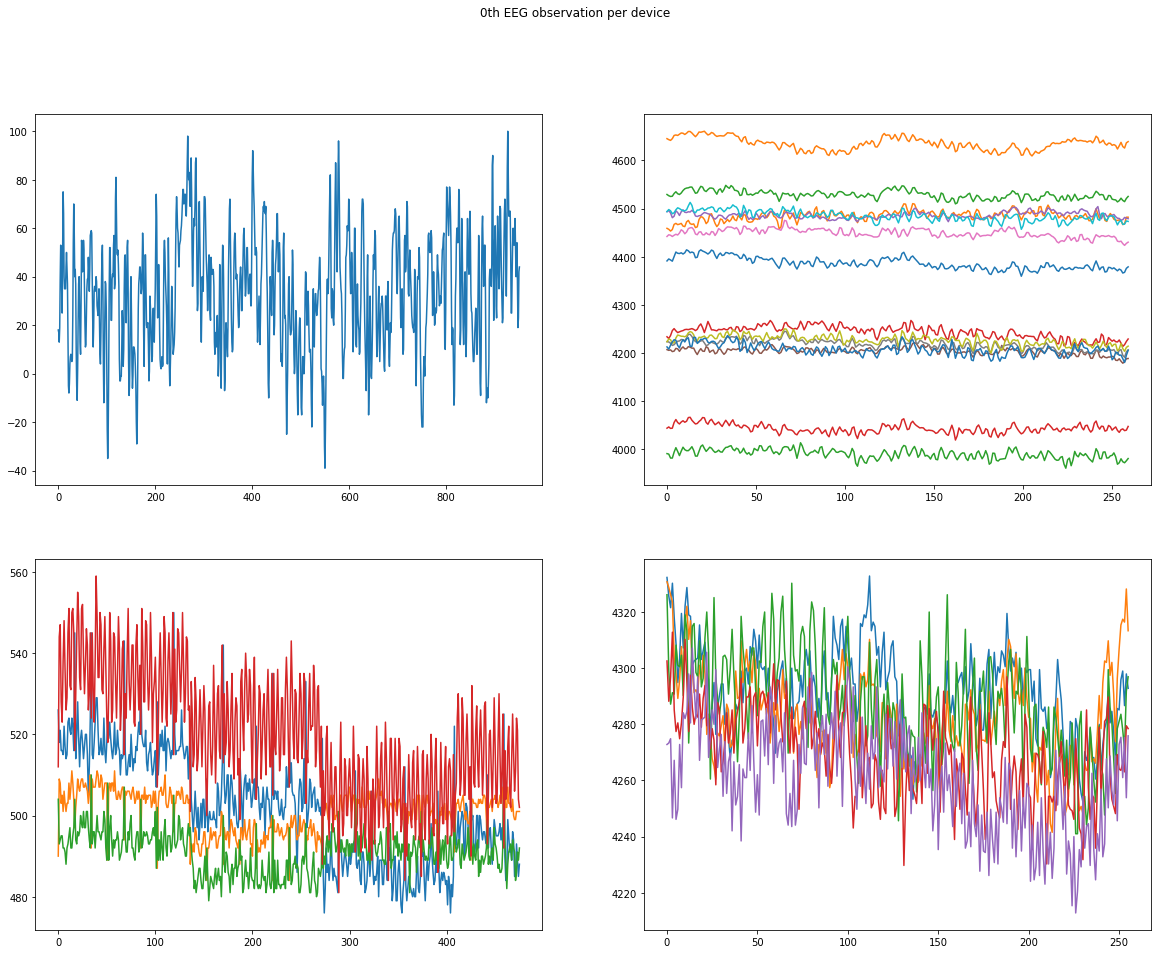

In [47]:
import matplotlib.pyplot as plt
index = 0
mw_obs = X.loc[X['device'] == 'MW'].iloc[index]
ep_obs = X.loc[X['device'] == 'EP'].iloc[index]
mu_obs = X.loc[X['device'] == 'MU'].iloc[index]
in_obs = X.loc[X['device'] == 'IN'].iloc[index]

signals = [mw_obs, ep_obs, mu_obs, in_obs]

fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()
fig.suptitle("{}th EEG observation per device".format(index))

for i, obs in enumerate(signals):
    for signal in obs['signals']:
        axs[i].plot(signal)
plt.show()

# Data distribution

---

# Fourier Transform


# Wavelets

---

# Estimators

---

# Submission

In [1]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from numpy.fft import fft, fftfreq


class DemocracyEstimator(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.categorical_transformer = OneHotEncoder()
        self.categorical_feature = ['device']
        self.signals_feature = ['signals']
        self.devices = ["MW", "EP", "IN", "MU"]
        self.estimators = {}
        self.transformers = {}
        for device in self.devices:
            self.estimators[device] = GradientBoostingClassifier()
            self.transformers[device] = ColumnTransformer(
                transformers=[
                    ('num', FunctionTransformer(
                        lambda X: feature_extractor(X)), self.signals_feature),
                ])

    def fit(self, X, y):
        X_dict = {}
        y_dict = {}
        for key in self.estimators.keys():
            X_dict[key] = X.loc[X['device'] == key]
            y_dict[key] = y[X['device'] == key]

        for key in self.estimators.keys():
            print("Fitting estimator of device: ",key, "with df_train.shape=",X_dict[key].shape)
            self.transformers[key].fit(X_dict[key])
            transformed_samples = self.transformers[key].transform(X_dict[key])
            self.estimators[key].fit(transformed_samples, y_dict[key])

        print("Fitting phase finished...")    
        return self

    def predict(self, X):
        y_pred = np.empty((X.shape[0]))
        for k in range(X.shape[0]):
            row = X.loc[[k], :]
            device = row.loc[k, "device"]
            row = self.transformers[device].transform(row)
            y_pred[k] = self.estimators[device].predict(row)
        return y_pred

    def predict_proba(self, X):
        prob_pred = np.empty((X.shape[0], 11))
        prob_pred[:] = np.nan
        n = X.shape[0]
        if n == 7144 :
            step = "Computing train score:"
        else : 
            step = "Computing cv score:"
        for k in range(n):
            row = X.loc[[k], :]
            device = row.loc[k, "device"]
            row = self.transformers[device].transform(row)
            aux = self.estimators[device].predict_proba(row)[0]
            if aux.size == 11:
                prob_pred[k, :] = aux
            else:
                prob_pred[k, :] = np.concatenate(([0], aux))
            if k%500 == 0:
                print(step,k,"/",n)
        return np.array(prob_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == np.array(y))


def feature_extractor(X_df):
    X_df = X_df.reset_index(drop=True)
    try :
        n_channels = len(X_df.loc[0,"signals"])
    except:
        print(X_df)
    X_df = X_df['signals']
    n_freq = 6
    n_features = 2 + n_freq
    feature_array = np.zeros((len(X_df), n_channels*n_features))
    for k, (_, x) in enumerate(X_df.iteritems()):
        len_list = len(x[0])
        # x is a multi-channel signals
        for i in range(n_channels):
            ft = fft(x[i])
            freqs_ft = fftfreq(len_list)
            ft, freqs_ft = ft[freqs_ft > 0], freqs_ft[freqs_ft > 0]
            magnitude_spectrum = np.abs(ft)
            indices = (-magnitude_spectrum).argsort()[:n_freq]
            freqs = freqs_ft[indices]
            feature_array[k, 8*i:(8*(i+1))] = np.concatenate(
                (freqs, np.mean(x[i]).reshape(-1), np.std(x[i]).reshape(-1)))
    return feature_array


clf = Pipeline(steps=[('classifier', DemocracyEstimator())])


def get_estimator():
    return clf